<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_2223/blob/main/Text%20mining/03_Topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modeling using LDA**

Latent Dirichlet Allocation (LDA) is a classical way to do topic modeling. Topic modeling is unsupervised learning and the goal is to group different documents to the same “topic”.

## **1. Text cleaning & Text processing**
Before you do topic modeling, you need make sure you clean and process the text. Please check the text processing notebook to follow the steps. Here we still use the same dataset and copy some codes from previous notebook.

In [1]:
# Let's import data first
# Run the code and upload the csv file from your laptop
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [32]:
# once you upload the data to the cloud, you can read the data into dataframe. 
# Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import io
import pandas as pd
df = pd.read_csv('Reviews.csv') # change the csv file name to your file name that you uploaded
df.head()

# Our target column is "Review"

,Title,Review,Rating,Date
0,Love this under-all cami tank ?,Originally i bought this in black and white. r...,5,07/06/2018
1,Staple tank!,Love this tank. material and fit are great. lo...,5,01/09/2018
2,Love but also very annoying,"I love this tank, it is so comfortable but it ...",2,30/06/2018
3,"Gorgeous top, straps way too long",I just adore this top! it is so comfy and styl...,4,18/07/2018
4,Great layering piece,This sweater is so comfy and classic - it bala...,5,11/07/2018


In [33]:
# data cleaning part

import re
import string

# drop data with missing values in the 'Review' column
df = df.dropna(subset=['Review'])

# convert the relevant column to lowercase
df['Review'] = df.Review.str.lower() 

# Remove overspace
df['Review'] = df['Review'].map(lambda x: re.sub('\s{2,}', " ", x))

# Remove punctuation

df['Review'] = df['Review'].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

# This dataset actually is pretty clean, so don't need to run all the steps mentioned previously

<>:13: DeprecationWarning: invalid escape sequence \s
<>:13: DeprecationWarning: invalid escape sequence \s
<ipython-input-33-1cc16fae18b9>:13: DeprecationWarning: invalid escape sequence \s
  df['Review'] = df['Review'].map(lambda x: re.sub('\s{2,}', " ", x))


In [34]:
# do tokenisation,lemmatisation and stopwords removal

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


# create a list of the reviews from the 'Reviews' column
words = df['Review'].tolist()

# tokenise the words
from nltk.tokenize import word_tokenize

# create an empty list to put the tokenised words
word_tokens = [] 
for review in words:
    word_tokens.append(word_tokenize(review))


# remove stopwords
from nltk.corpus import stopwords
# use English stopwords
stopwords = stopwords.words("english")
# you can also extend the stopwords list with more words that you want to remove
stopwords.extend(['re'])

# create a new list with stop words removed
tokens_without_stopwords = []
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stopwords])


# lemmatise the words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# The lemmatizer requires the correct POS tag to be accurate, if you use the default settings of the WordNetLemmatizer.lemmatize(), the default tag is noun.
# Which means the words other than noun would not be lemmatised, and this is not what we expect.
# Therefore we need to define the POS tags ('n' for nouns(default), 'a' for adj, 'v' for verb, 'r' for adverb) which are allowed to be lemmatised.

lemmatised = []
for review in tokens_without_stopwords: 
  n_lemmatised = [lemmatizer.lemmatize(w) for w in review]
  v_lemmatised = [lemmatizer.lemmatize(w,'v') for w in n_lemmatised]
  r_lemmatised = [lemmatizer.lemmatize(w,'r') for w in v_lemmatised]
  a_lemmatised = [lemmatizer.lemmatize(w,'a') for w in r_lemmatised]
  lemmatised.append(a_lemmatised) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
# put the tokens back together as text to have our filtered reviews
import string
rejoin = []
for review in lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(review) # join the text back together 
    # remove punctuation from the reviews using the string package
    rejoin.append(x)

# add the reformed text to the data frame    
df['filtered_review'] = rejoin

## **2. Vectorisation**

In [41]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer

max_words = 1000 #how many words taking account for topic modeling 
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df['filtered_review'])

## **3. Build the LDA model**

In [42]:
# fit LDA

from sklearn.decomposition import LatentDirichletAllocation as LDA

k = 5 #this is the number of the topic. you can decide the number
lda = LDA(n_components=k, max_iter=5, learning_method='online')
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=5)

## **4. Visualisation of the topics**

Topic#  1
size,small,fit,order,top,large,run,would,like,love,medium,wear,get,think,well,big,little,print,usually,look,cute,go,really,even,arm,fabric,one,want,color,bite,true,try,pretty,tight,make,back,chest,say,still,shirt,buy,return,much,beautiful,however,could,normally,body,10,perfectly

Topic#  2
top,look,like,love,back,shirt,shoulder,material,wear,make,fit,color,picture,would,front,bra,nice,cut,sleeve,work,really,sheer,detail,pretty,much,beautiful,go,flat,low,way,also,good,cami,well,neck,bite,underneath,great,right,feel,little,style,bottom,lace,show,quality,side,need,tank,soft

Topic#  3
fabric,size,wait,top,quality,hit,tall,gorgeous,price,lb,look,try,fit,dress,flat,suit,make,give,would,long,feminine,wear,high,love,great,plan,think,like,otherwise,peplum,last,nice,buy,full,problem,hip,felt,overall,thread,well,pretty,true,good,piece,worth,design,slit,waist,store,chest

Topic#  4
blouse,color,fabric,fit,short,try,one,store,see,top,button,shirt,size,white,look,like,love,think,length,go

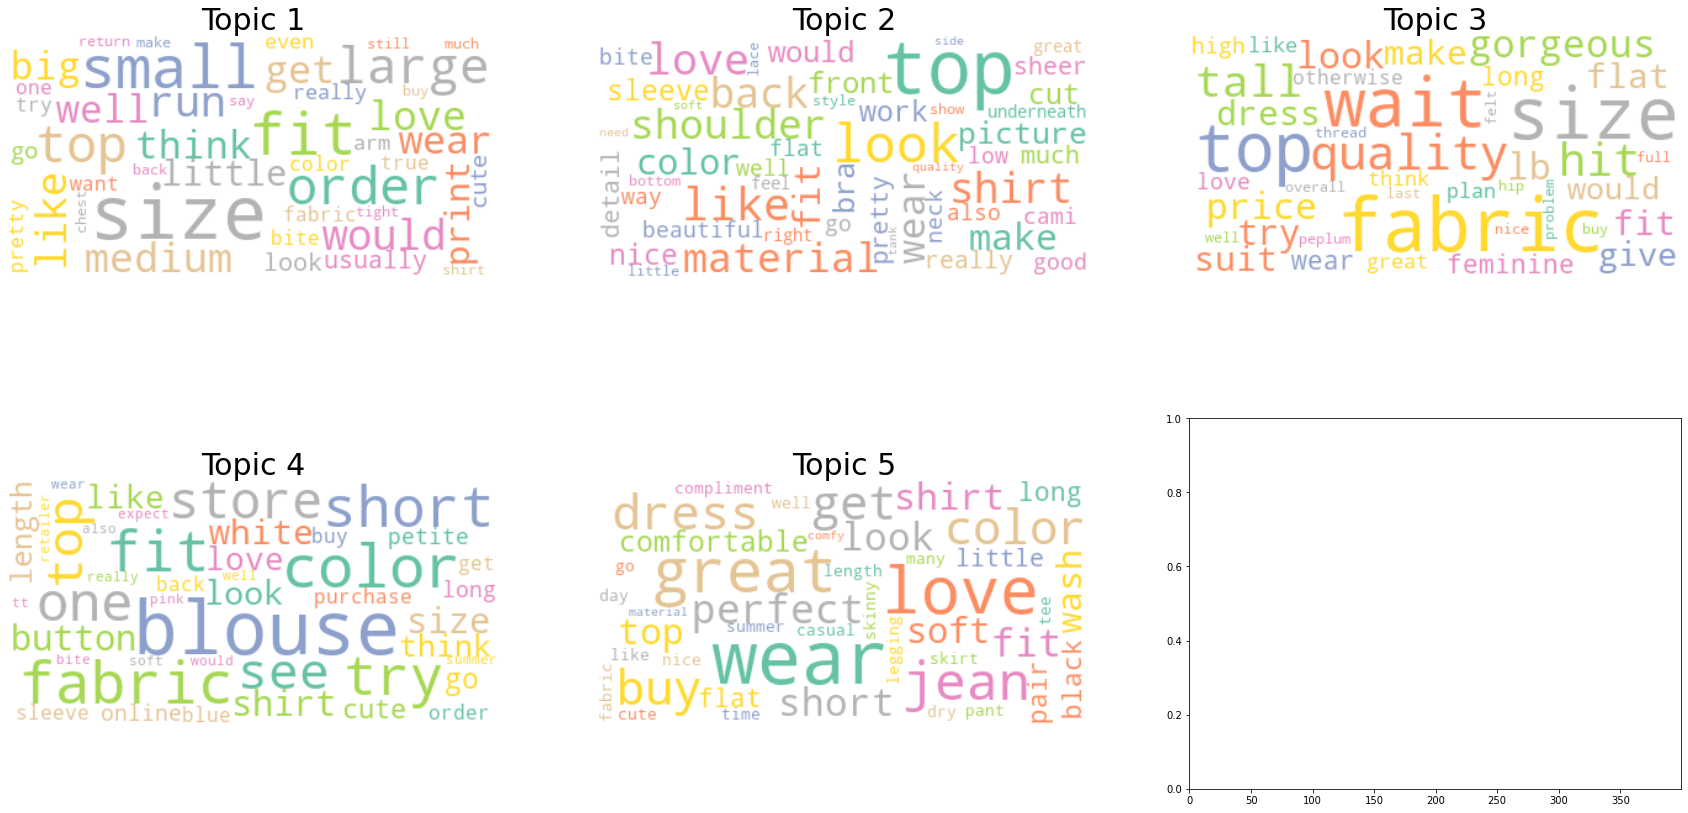

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 50

terms = vectorizer.get_feature_names_out()

wcloud = wordcloud.WordCloud(background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')

fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):    
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}
    
    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)    
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


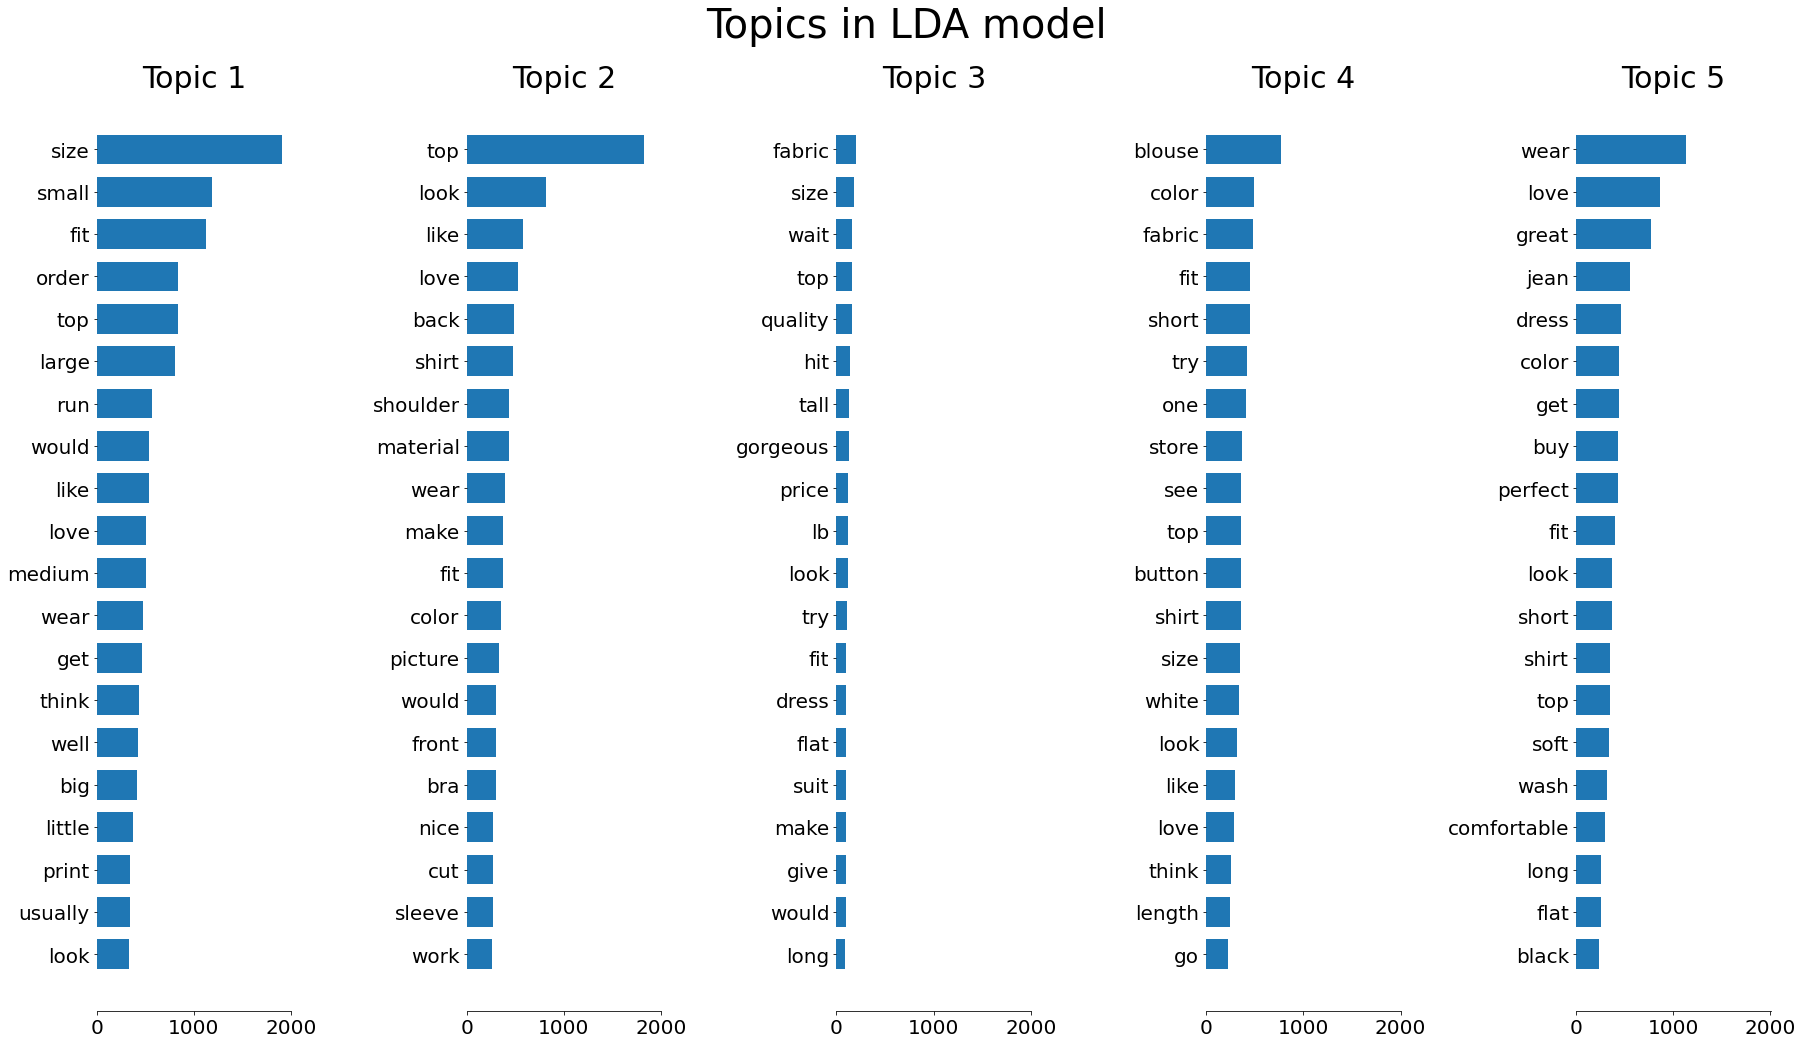

In [44]:
# Visualise the result into topic clouds

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al. 
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

In [45]:
# visualise the result with pyLDAvis

!pip install pyLDAvis # install the package for the first time running

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda, vec, vectorizer)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.002186  0.112122       1        1  27.594890
1     -0.071422  0.077541       2        1  23.501183
4     -0.101050 -0.188857       3        1  20.417768
3     -0.065704  0.045081       4        1  19.528373
2      0.235990 -0.045887       5        1   8.957786, topic_info=       Term         Freq        Total Category  logprob  loglift
761    size  2530.000000  2530.000000  Default  30.0000  30.0000
135  blouse   743.000000   743.000000  Default  29.0000  29.0000
777   small  1282.000000  1282.000000  Default  28.0000  28.0000
455    jean   584.000000   584.000000  Default  27.0000  27.0000
469   large   829.000000   829.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
871   think    88.374885   836.979950   Topic5  -4.8797   0.1644
952    wear    93.988594  2252.215054   Topic5  -4.8181  -0.7638
396   great    89.186090  1295.259323   Topic5  -4.8705  -0.2631
504    love    89.401332  2258.708680   Topic5  -4.8681  -0.8168
489    like    87.955060  1684.772514   Topic5  -4.8844  -0.5399

[383 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         1  0.990601         10
1         2  0.005503         10
1         4  0.005503         10
3         4  0.974737        110
4         5  0.986992        115
...     ...       ...        ...
988       1  0.733225         xl
988       2  0.217482         xl
988       4  0.049710         xl
993       4  0.990270     yellow
995       1  0.979162  yesterday

[736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 4, 3])

In [ ]:
doc_topic = lda.transform(vec)
docsVStopics = pd.DataFrame(doc_topic, columns=["Topic"+str(i+1) for i in range(k)])
df = df.join(docsVStopics)
df['mostlikely_topic'] = docsVStopics.idxmax(axis=1)

df.to_csv('topic_modeling_result.csv', index=False) # save the file to google drive
files.download('topic_modeling_result.csv') # download the file to your local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>